In [1]:
# First, the libraries to be used will be imported:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Then, the variables that will not change throughout the simulation will be defined:
sigma_i = 0 # I consider that there is no internal noise
xi_i = 0
tau = 200 #ms
tf = tau/40 #ms

## Perfect Integrator


In [18]:
# Defining the values used for this simulation
mu = 0.15
start_sigma_s = 0
final_sigma_s = 1
step = 0.1
per_error_list = []
stimulus_values = np.random.randn(1000,400)
alfa = 1
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    error_list = []
    for stimulus in stimulus_values:
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        # The process will be repeated a two hundred times (1 second stimulus)
        for xi_s in stimulus:
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # All x will be stored in the deccision value list:
            decision_value.append(x)

        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1]>=0
        negative_decision = decision_value[len(decision_value)-1]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)

    # Printing the error for each mu
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)

Text(0.5,1,'Accuracy over sigma_s value for the DW perfect integrator model')

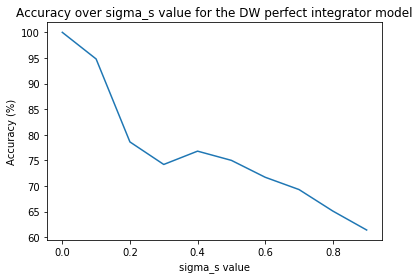

In [20]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step), per_error_list)
#plt.plot(np.arange(start_sigma_s, final_sigma_s, step),per_error_list,"ro")
plt.ylabel("Accuracy (%)")
plt.xlabel("sigma_s value")
plt.title("Accuracy over sigma_s value for the DW perfect integrator model")